# Notebook: Trabajo Final de Inteligencia Artificial "Cloud Infrastructure Anomaly Detection" (Detección de Anomalías en Infraestructura en la Nube)
Autores: Breiner Gonzalez Machado<sup>1</sup>, Martín Pallares Páez<sup>1</sup>, Luis Miguel Toscano<sup>1</sup>
<br>
<sup>[1]</sup> Programa de Ingeniería de Sistemas, Facultad de Ingeniería, Universidad del Magdalena

El presente notebook presenta el proceso y desarrollo del trabajo final del curso de Inteligencia Artificial para el Programa de Ingeniería de Sistemas en la Universidad del Magdalena en el periodo académico 2025-2, en el que se entrenan algunos modelos de aprendizaje de máquina supervisado sobre el conjunto de datos (dataset) asignado para la puesta en acción del presente ejercicio, llamado "Cloud Infrastructure Anomaly Detection" (Datos para la detección de anomalías en la infraestructura de la nube) de Sandhya Peesara y disponible en Kaggle siguiendo el enlace: https://www.kaggle.com/datasets/sandhyapeesara/cloud-anomaly-data


## I. Descripción del Problema e Inspección del Conjunto de Datos

### 1. Descripción del Problema

En la computación en la nube, miles de máquinas virtuales (VMs) ejecutan servicios y aplicaciones que requieren alta disponibilidad, estabilidad y seguridad. Sin embargo, durante sus operaciones pueden presentarse anomalías debido a sobrecarga de recursos, fallos de hardware, errores de configuración, comportamientos inesperados de procesos o ciberataques. La detección temprana de estas anomalías es esencial para prevenir caídas prolongadas, pérdida de datos, disminución del rendimiento y costos operativos elevados.

La detección manual es inviable, debido al volumen y la velocidad con la que se generan métricas en sistemas distribuidos. Por esta razón, se emplean métodos de aprendizaje automático, que permiten identificar patrones normales y reconocer desviaciones significativas que correspondan a comportamientos anómalos. De acuerdo con Chandola, Banerjee y Kumar (2009), la detección de anomalías es una tarea clave en la supervisión de sistemas donde el comportamiento esperado puede ser modelado a partir de datos históricos.

El conjunto de datos utilizado en este proyecto proviene del repositorio de Kaggle **“Cloud Infrastructure Anomaly Detection Data”**, publicado por Sandhya Peesara en su última versión actualizada en 2025. El dataset contiene registros de comportamiento operativo de varias máquinas virtuales, junto con una etiqueta denominada **“Anomaly status”**, que clasifica los registros como:

- **0 → Normal**
- **1 → Anómalo**

Por lo tanto, nuestro problema corresponde a una **tarea de clasificación supervisada**, donde el objetivo es entrenar modelos capaces de **predecir si el estado de una VM es normal o anómalo** utilizando sus métricas de rendimiento como variables predictoras.

#### Sobre el Dataset

El dataset se encuentra en el archivo `Cloud_Anomaly_Dataset.csv`. Este conjunto de datos, contiene información operacional medida en diferentes puntos del tiempo de múltiples máquinas virtuales para la fiabilidad y la detección de fallos. Las variables que este dataset proporciona son:

| Variable | Tipo | Descripción |
|--------|------|-------------|
| `vm_id` | Categórica | Identificador único de la máquina virtual. |
| `timestamp` | Tiempo | Marca temporal del registro de métricas. |
| `cpu_usage` | Numérica (%) | Porcentaje de uso del procesador. |
| `memory_usage` | Numérica (%) | Uso de memoria RAM. |
| `network_traffic` | Numérica (bytes/s) | Tráfico de red generado. |
| `power_consumption` | Numérica (W) | Consumo energético. |
| `num_executed_instructions` | Numérica | Número de instrucciones ejecutadas. |
| `execution_time` | Numérica (s) | Tiempo de ejecución de la tarea. |
| `energy_efficiency` | Numérica | Relación entre trabajo y energía consumida. |
| `task_type` | Categórica | Tipo de tarea (`compute`, `network`, `io`, etc.). |
| `task_priority` | Categórica | Prioridad de la tarea (`low`, `medium`, `high`). |
| `task_status` | Categórica | Estado de ejecución (`running`, `completed`, etc.). |
| **`Anomaly status`** | Binaria (0/1) | Etiqueta objetivo del modelo. |

*Observaciones preliminares:*

- A simple vista se observa la existencia de algunos valores faltantes en múltiples columnas, por lo que será necesario analizar y decidir que técnicas o metodologías amplicar para preparar correctamente los datos antes del entrenamiento de los modelos.
- A primeras impresiones se puede intuir que el dataset está fuertemente desbalanceado, con predominancia de registros etiquetados como **normales (0)** sobre **anómalos (1)**. Este desbalance afecta directamente el rendimiento de clasificadores tradicionales (He & Garcia, 2009), por lo que se pueden evaluar técnicas como:
  - Rebalanceo mediante Oversampling (SMOTE)
  - Undersampling
  - Ajuste de pesos de clase al entrenar los modelos

#### Objetivo General

> El objetivo general de este proyecto es analizar, preprocesar y utilizar el conjunto de datos para entrenar y comparar modelos de aprendizaje supervisado que permitan clasificar si el comportamiento de una máquina virtual es normal o anómalo. Se evaluarán modelos basados en regresión, árboles de decisión, Random Forest y redes neuronales (MLP y DNN), comparando su desempeño mediante métricas como *accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC.*

#### Objetivos Específicos

1. Explorar y analizar el conjunto de datos, identificando la distribución de las variables, la presencia de valores faltantes, patrones en las métricas de rendimiento y el grado de desbalance en la variable objetivo (*Anomaly status*).

2. Realizar el preprocesamiento del dataset, aplicando técnicas de limpieza de datos, imputación de valores faltantes, transformación de variables categóricas y normalización/estandarización cuando sea necesario.

3. Aplicar estrategias para tratar el desbalance de clases, evaluando técnicas como *oversampling* (por ejemplo, SMOTE), *undersampling* o el ajuste de pesos de clase en los modelos supervisados.

4. Entrenar y ajustar modelos de aprendizaje supervisado (regresión multivariada, árbol de decisión, Random Forest, MLP y DNN), empleando validación cruzada y búsqueda de hiperparámetros mediante *GridSearchCV*.

5. Evaluar el desempeño de los modelos entrenados utilizando métricas de clasificación apropiadas como *accuracy*, *precision*, *recall*, *F1-score*, *matriz de confusión* y *AUC-ROC*, analizando su capacidad para identificar correctamente estados anómalos.

6. Comparar los resultados obtenidos entre los distintos modelos, identificando fortalezas y debilidades de cada enfoque, así como las condiciones bajo las cuales presentan mejor desempeño.

7. Elaborar conclusiones y recomendaciones sobre el modelo más adecuado para la detección de anomalías en máquinas virtuales en la nube, indicando posibles líneas de trabajo futuro orientadas a mejorar la precisión, estabilidad o aplicabilidad del sistema.

### 2. Inspección del Conjunto de Datos

**Importación de las Librerías**

Para comenzar con la inspección y análisis del conjunto de datos, es necesario importar algunas librerías, para el procesamiento del dataset en un DataFrame usaremos `pandas`, `numpy` para algunas funciones útiles, y `matplotlib` y `seaborn` para la visualización de gráficas.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Configuración de Gráficos**

Para vizualizar correctamente los graficos definimos la función `set_graph_style` para configurar las librerías de `matplotlib` y `seaborn` y asegurar un estilo prolijo y consistente en los diferentes graficos que se generarán dentro de este notebook a continuación.

In [38]:
# Configuración de gráficos
%matplotlib inline
def set_graph_style():
    
    # Estilo base Seaborn
    sns.set(
        style="darkgrid",
        context="talk",
        palette="Set2"
    )

    # Ajustes de Matplotlib
    plt.rcParams.update({
        # Líneas y bordes
        'lines.linewidth': 1,
        'axes.linewidth': 1,
        'patch.linewidth': 1,
        'grid.linewidth': 1,
        
        # Colores y cuadrícula
        'axes.edgecolor': 'black',
        'grid.color': 'black',
        'grid.alpha': .1,
        'patch.edgecolor': 'black',
        
        # Texto y etiquetas
        'text.color': 'black',
        'axes.labelcolor': 'black',
        'xtick.color': 'black',
        'ytick.color': 'black',
        'font.size': 12,
        'font.family': 'sans-serif',
        'font.sans-serif': ['DejaVu Sans', 'Arial', 'Liberation Sans'],

        # Tamaños de ticks
        'xtick.major.size': 5,
        'ytick.major.size': 5,
    })

set_graph_style()

**Cargando el DataSet**

Ahora es imprescindible cargar el dataset `Cloud_Anomaly_Dataset.csv` en un DataFrame, aquí denominado `df` haciendo uso de la función `.read_csv()` de la librería pandas. Y para tener una vista priliminar de los datos cargados en crudo mostramos las primeras filas con la adición de la función `.head()` pasando como parametro el número `20` que indica el número de filas a mostrar con el fin de explorar de manera cruda algunos datos y partir con una idea de cómo se ven y qué pueden representar cada columna de nuestro conjunto de datos a trabajar.

In [39]:
# Cargar el dataset
df = pd.read_csv("Cloud_Anomaly_Dataset.csv")

# Mostrar las primeras filas
df.head(20)

,vm_id,timestamp,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status,Anomaly status
0,c5215826-6237-4a33-9312-72c1df909881,25-01-2023 09:10,54.881350,78.950861,164.775973,287.808986,7527.0,69.345575,0.553589,network,medium,waiting,0
1,29690bc6-1f34-403b-b509-a1ecb1834fb8,26-01-2023 04:46,71.518937,29.901883,NaN,362.273569,5348.0,41.396040,0.349856,io,high,completed,0
2,2e55abc3-5bad-46cb-b445-a577f5e9bf2a,13-01-2023 23:39,NaN,92.709195,203.674847,231.467903,5483.0,24.602549,0.796277,io,medium,completed,0
3,ea8455b0-251c-4470-b7ea-8d40476e3434,14-01-2023 19:59,79.172504,2.972252,926.374030,173.559325,8644.0,55.702673,0.779499,compute,medium,completed,0
4,fd28310b-be6f-4320-a664-de02274993d9,18-01-2023 11:22,87.001215,46.620176,437.188115,77.054702,9427.0,NaN,0.207164,NaN,low,waiting,0
5,d8556493-5092-46ea-9477-fb7a722b215e,15-01-2023 06:40,61.693400,0.665019,686.374706,154.891172,6006.0,99.542059,0.992291,compute,medium,completed,0
6,6f8b5688-ac95-4369-b552-6938fe3c2baa,24-01-2023 15:43,43.703195,28.118220,NaN,448.020527,4628.0,81.336898,0.540977,io,NaN,running,0
7,aaa03097-d35c-44cc-af28-08ac4a8ac005,15-01-2023 21:12,67.063787,56.200805,856.372924,300.816338,3925.0,1.625046,0.979356,io,high,running,0
8,6b6d4ad7-615b-4aeb-be4e-002fb053850e,21-01-2023 13:38,12.892630,NaN,906.808046,330.207842,6940.0,14.172431,0.123155,io,low,completed,1
9,1419b321-a100-46de-a38d-0a7a14e510e2,19-01-2023 04:41,83.794491,18.781377,347.694315,395.090687,NaN,29.873152,0.361522,network,low,NaN,0


Con estos primeros registros del dataset podemos apreciar la naturaleza del conjunto de datos: 

- `vm_id` como identificador de la maquina virtual de la que proviene el registro con lo que parece un tipo de UUID.
- Una columna con temporalidad `timestamp` que deberemos evaluar para determinar si exite o no relación en tanto a la incidencia de anomalías en periodos temporales específicos.
- La precencia de posibles variables predictoras numéricas `cpu_usage`, `memory_usage`, `network_traffic`, `power_consumption`, `num_executed_instructions`, `execution_time`, `energy_efficiency` con valores aparentemente flotantes y que deberemos escalar en la siguiente sección del notebook. 
- De posibles variables predictoras categóricas `task_type`, `task_priority`, `task_status` que consideraremos convertirlas/codificarlas a variables numéricas según su naturaleza nominal u ordinal, aspecto que también determinaremos más adelante en este notebook.
- Algunos detalles con respecto a la calidad de los ejemplos y que deberemos verificar con informes y gráficas para poderiormente aplicar algunos mecanismos para ser corregidos como lo son en los datos faltantes de alguno de los registros para una o más variables aquí descritas.
- Una variable binaria a predecir, denominada como `Anomaly status` ya que el conjunto de datos consiste de dos clases etiquetadas como 0 para rendimiento de maquinas virtual con un estado normal, y 1 para rendimiento de maquinas virtuales que presentan alguna anomalía.

**Informe del DataSet**

Para más detalles y confirmar lo visto y supuesto en los items descritos y analizados anteriomente con los primeros registros, se hace necesario generar un informe sobre el contenido del archivo completo cargado en el DataFrame anterior, y para lograrlo, hacemos uso de la función `.info()` también de la librería pandas, e imprimimos el resultado.

In [265]:
# Generar informe de los datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277570 entries, 0 to 277569
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   vm_id                      249595 non-null  object 
 1   timestamp                  277570 non-null  object 
 2   cpu_usage                  250130 non-null  float64
 3   memory_usage               249775 non-null  float64
 4   network_traffic            249725 non-null  float64
 5   power_consumption          250018 non-null  float64
 6   num_executed_instructions  249637 non-null  float64
 7   execution_time             249960 non-null  float64
 8   energy_efficiency          249616 non-null  float64
 9   task_type                  249580 non-null  object 
 10  task_priority              249674 non-null  object 
 11  task_status                249621 non-null  object 
 12  Anomaly status             277570 non-null  int64  
dtypes: float64(7), int64(1), obje

Con este informe, ahora, sabemos con certeza que el conjunto de datos cuenta con exactamente **277,570 registros** y **13 columnas**, lo cual indica que se trata de un dataset de tamaño relativamente considerable y que es adecuado para entrenar modelos de aprendizaje supervisado. Y confirmamos lo supuesto en la visualización preliminar:

- Variables numéricas **(7)**: `cpu_usage`, `memory_usage`, `network_traffic`, `power_consumption`, `num_executed_instructions`, `execution_time`, `energy_efficiency`.
- Variables categóricas **(4)**: `task_type`, `task_priority`, `task_status`, `vm_id`.
- Variable temporal **(1)**: `timestamp`.
- Variable objetivo **(1)**: `Anomaly status`.

Se observa que varias columnas presentan valores faltantes, particularmente las relativas a métricas operacionales y características de tareas. Por ejemplo, columnas como `vm_id`, `memory_usage`, `network_traffic`, `num_executed_instructions` y `task_status` no contienen el 100% de sus valores. Esto indica la necesidad que tenemos de aplicar técnicas de imputación de datos durante la fase de preparación, para lo cual podremos incluir estrategias como la imputación por media, mediana o modelos específicos según el comportamiento de cada variable.

La variable `timestamp` se encuentra en formato de texto (`object`), y para realizar el análisis más avanzados de generación de variables de tendencia será necesario convertirla al tipo `datetime`.

La columna `Anomaly status`, que representa la variable a predecir, no presenta valores faltantes y es de tipo entero, lo que confirma que se trata de un problema de clasificación.

En este sentido, hasta este punto para la fase de preparación de los datos tenemos que:
- Será necesario tratar valores faltantes en múltiples columnas.
- Las variables categóricas deberán ser codificadas numéricamente para poder ser utilizadas por los modelos de aprendizaje supervisado respetando su denominación nominal u ordinal.
- La variable temporal requerirá conversión y extracción de características y decidir si serán útiles.

**Resumen Estadístico del DataSet**

Ahora, generar un resumen estadístico de las variables numéricas del conjunto de datos con la función `.describe()` será de utilidad para detectar posibles errores en los datos de las variables numéricas.

In [266]:
# Generar el resumen estadístico
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cpu_usage,250130.0,50.013258,28.895806,0.000071,24.880023,50.023806,75.097896,99.999171
memory_usage,249775.0,49.967249,28.879090,0.000016,24.965105,49.912051,74.960052,99.999907
network_traffic,249725.0,500.554083,288.787794,0.002542,250.298114,500.736963,750.720026,999.998686
power_consumption,250018.0,249.987238,144.662676,0.000802,124.199907,250.397212,375.485305,499.998819
num_executed_instructions,249637.0,5002.490284,2882.806422,0.000000,2506.000000,5000.000000,7499.000000,9999.000000
execution_time,249960.0,50.011964,28.837634,0.000172,25.098016,50.005593,75.043715,99.998831
energy_efficiency,249616.0,0.500369,0.288547,0.000004,0.250375,0.500834,0.750112,0.999994
Anomaly status,277570.0,0.059999,0.237486,0.000000,0.000000,0.000000,0.000000,1.000000


En este análisis descriptivo del conjunto de datos podemos observar una distribución relativamente equilibrada de las variables predictoras, sus medias están centradas muy cerca de los puntos medios, y los cuartiles están distribuidos de manera muy uniforme a lo largo de sus rangos con los extremos `min` y `max` de cada variable, por ejemplo, `cpu_usage` va de 0 a 100 con una media de 50 y cuartiles espaciados muy cerca del valor de cada porcentaje representativo. No se evidencia presencia de valores atípicos que consideremos relevantes. Las métricas de rendimiento del sistema, como el `cpu_usage`, `memory_usage`, `network_traffic` y `power_consumption`, presentan una variabilidad esperable y coherente entre sí, y en especial, para la `energy_efficiency` muestra valores normalizados, lo que nos sugiere una adecuada estandarización de los datos.

**Distribución de las Clases**

Es relevante hacer una inspeccion gráfica que pueda ser aún más diciente. Primero sobre la distribución de las clases de `Anomaly status` a través de un histograma, y segundo, de la representatividad mediante una diagrama de torta para validar el nivel de balanceo del conjunto de datos.

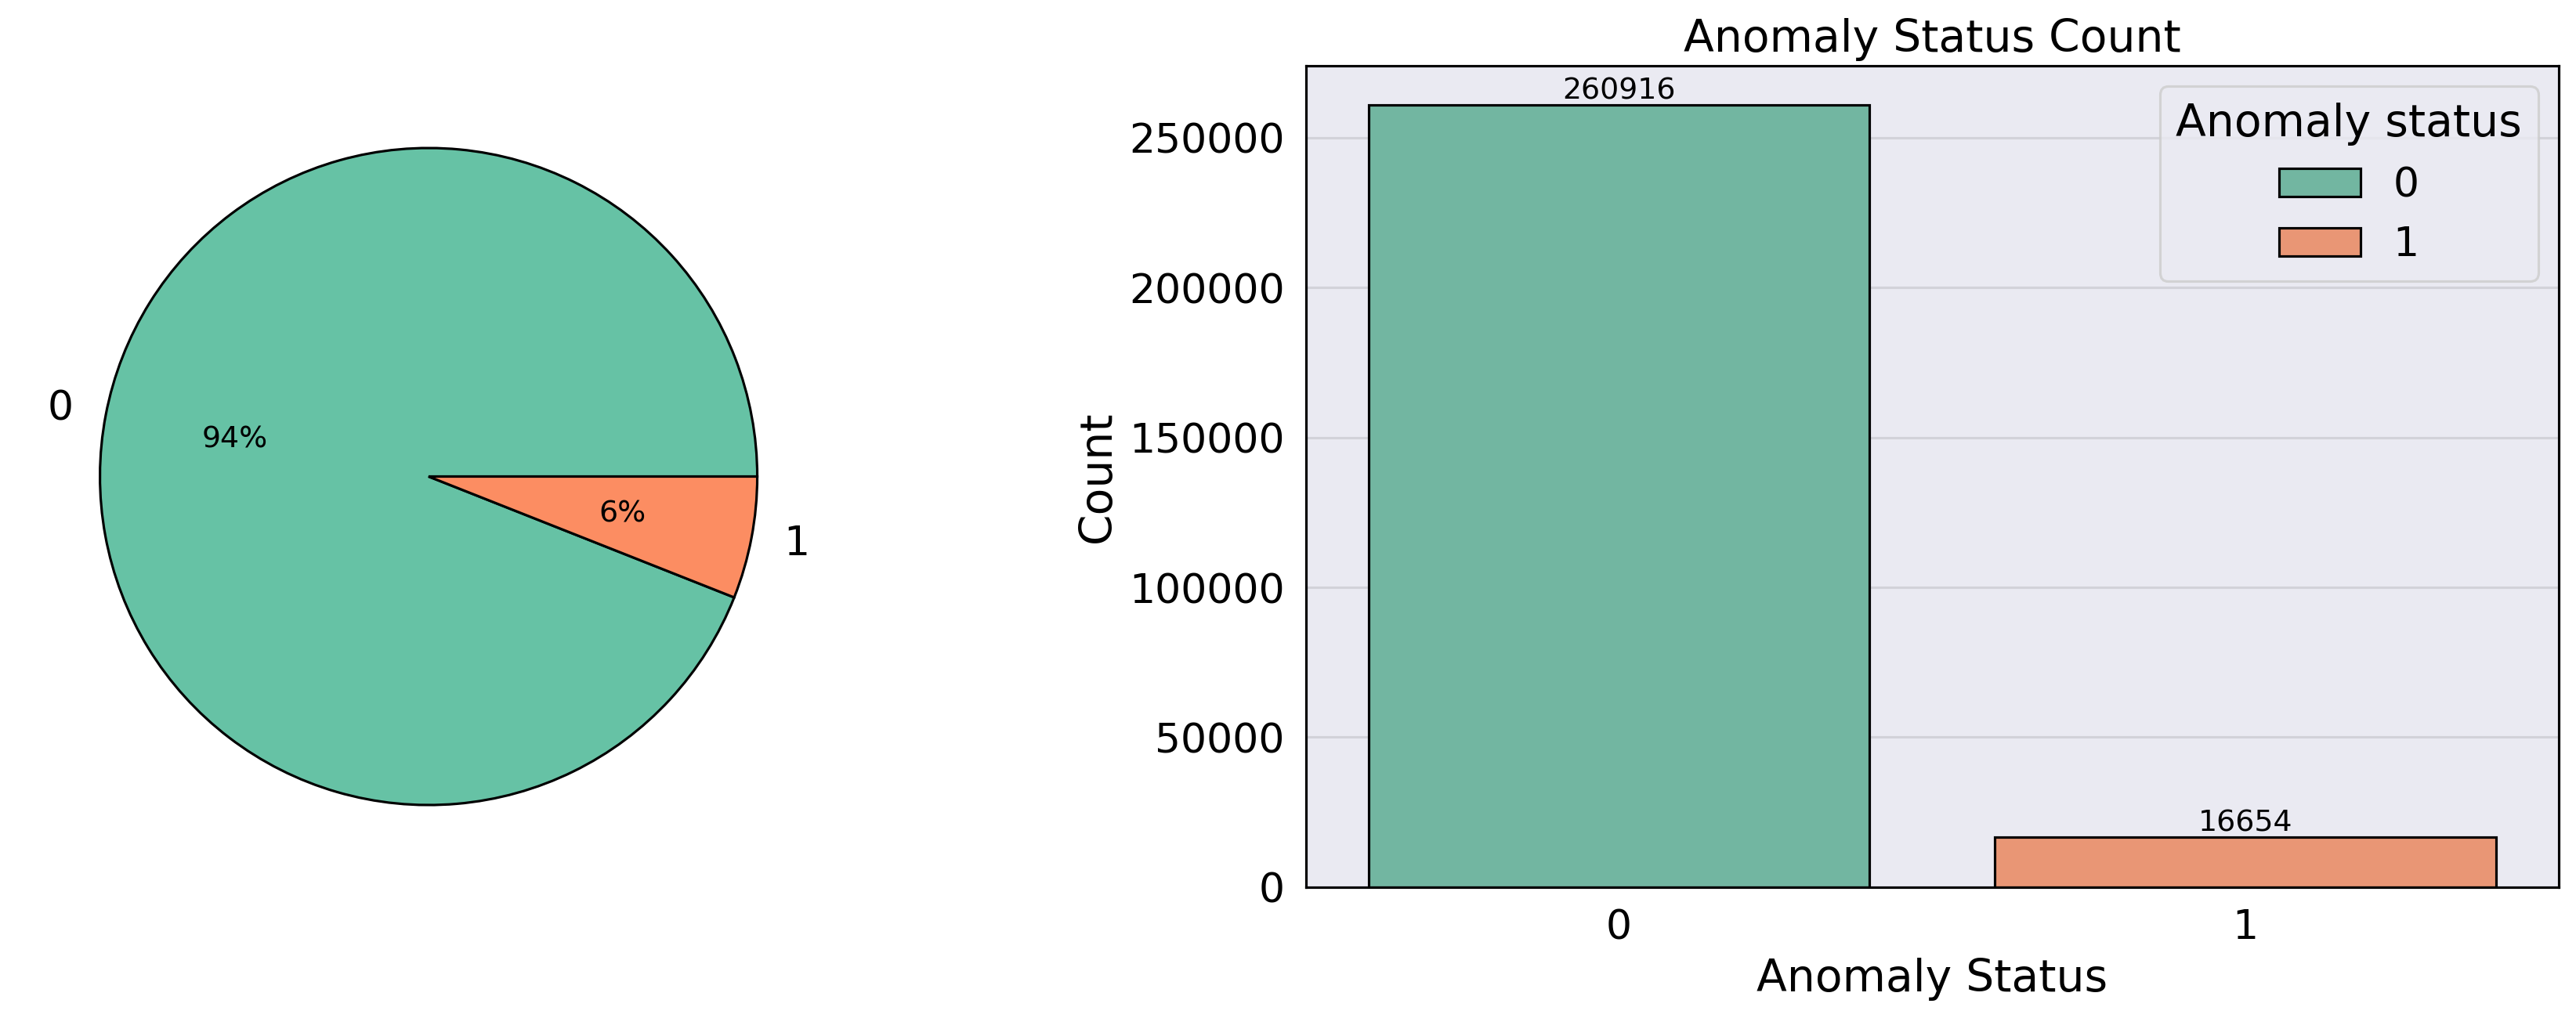

In [ ]:
# Histograma y diagrama de torta del atributo clase
labels = df['Anomaly status'].unique()
dist = (df['Anomaly status'].value_counts()).to_numpy()

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(dist, labels = labels, autopct='%1.0f%%')
plt.subplot(1, 2, 2)
ax = sns.countplot(x = 'Anomaly status', hue = 'Anomaly status', data = df)

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('Anomaly Status')
plt.ylabel('Count')
plt.title("Anomaly Status Count")
plt.show()

Al observar las gráficas de la variable `Anomaly status`, se confirma la sospecha preliminar ya que se nota claramente que el conjunto de datos está fuertemente desbalanceado. La gran mayoría de los registros, que son alrededor del 94%, corresponden a un funcionamiento normal del sistema (0), mientras que solo un 6% reflejan situaciones anómalas (1).

Este resultado nos hace sentido si consideramos que, en un entorno real de infraestructura en la nube, los eventos anómalos suelen ser poco comunes frente a la gran cantidad de operaciones normales que ocurren constantemente. Sin embargo, este desbalance en el dataset representa un reto para los modelos de detección que entrenaremos más adelante, ya que podrían aprender con mayor facilidad a reconocer los casos normales y pasar por alto las anomalías. Por ello, será importante aplicar alguna estrategia de balanceo o utilizar métricas de evaluación adecuadas que reflejen correctamente el rendimiento del modelo en la detección de estos casos minoritarios.

**Distribución de las Variables Predictoras Numéricas**

Para ampliar la inspección gráfica, generaremos un histograma y adicionalmente un gráfico de cajas y bigotes para visualizar la distribución de cada una de las variables numéricas del conjunto de datos.

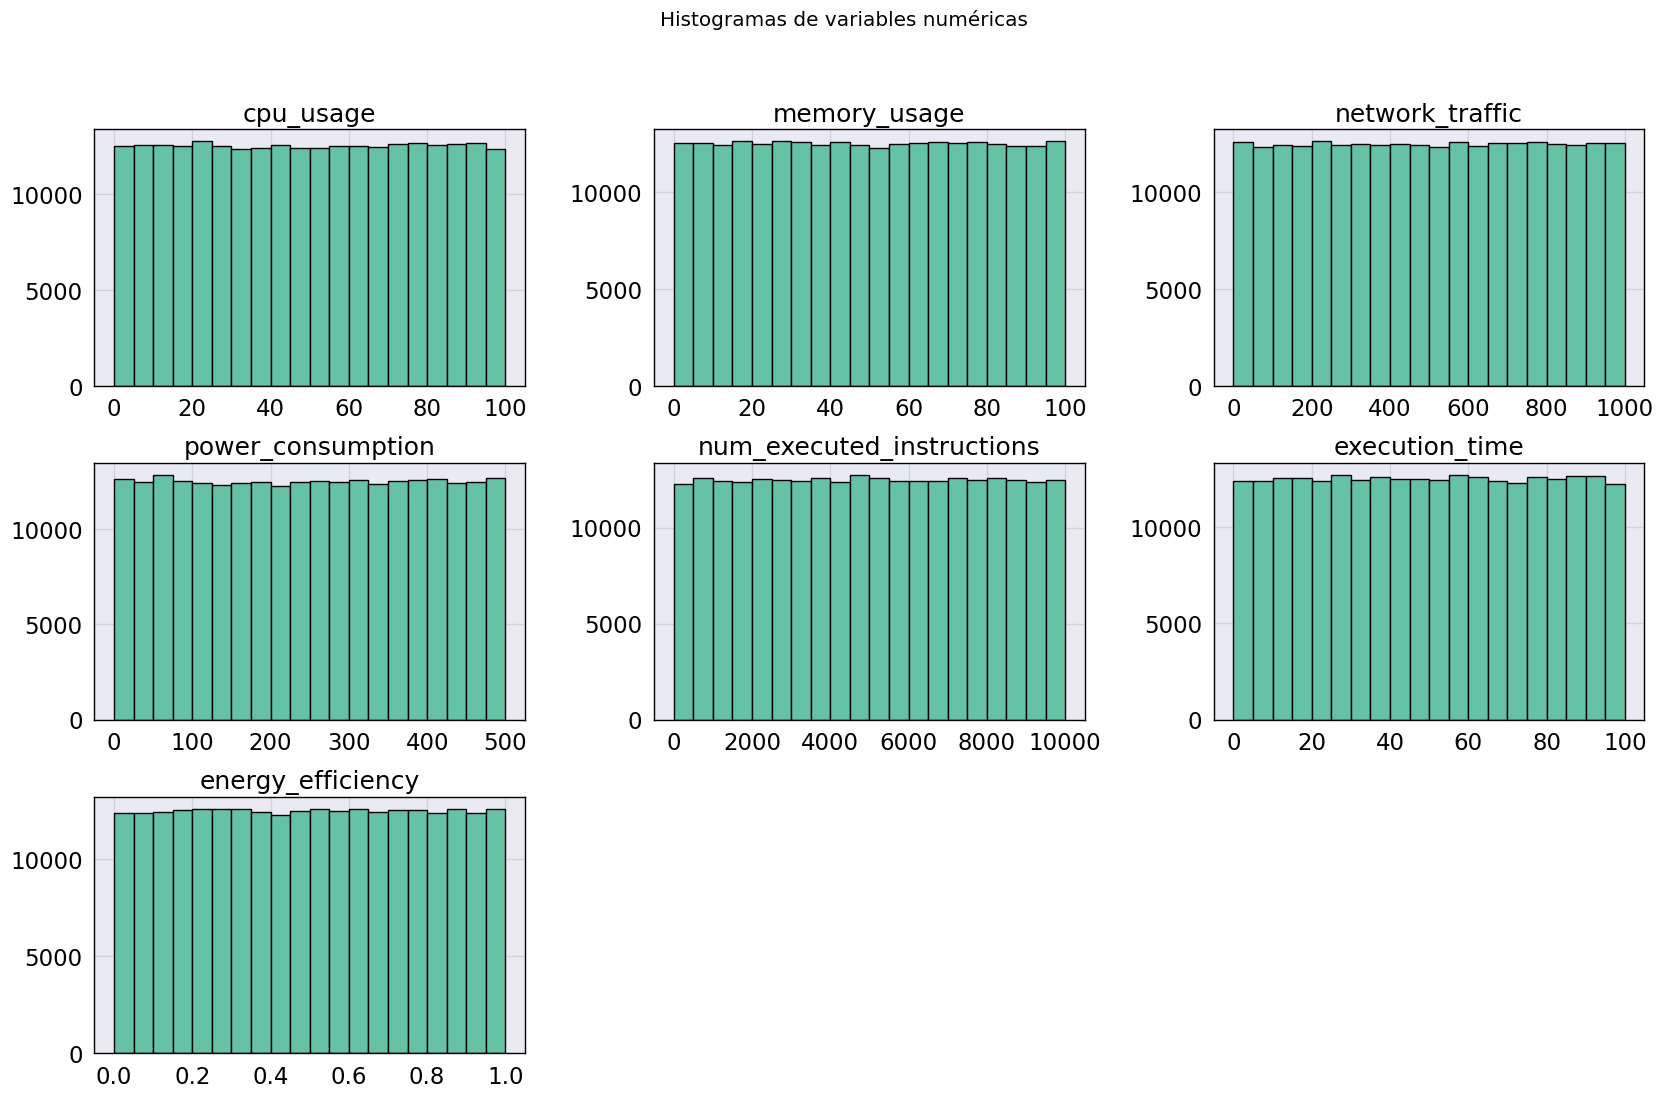

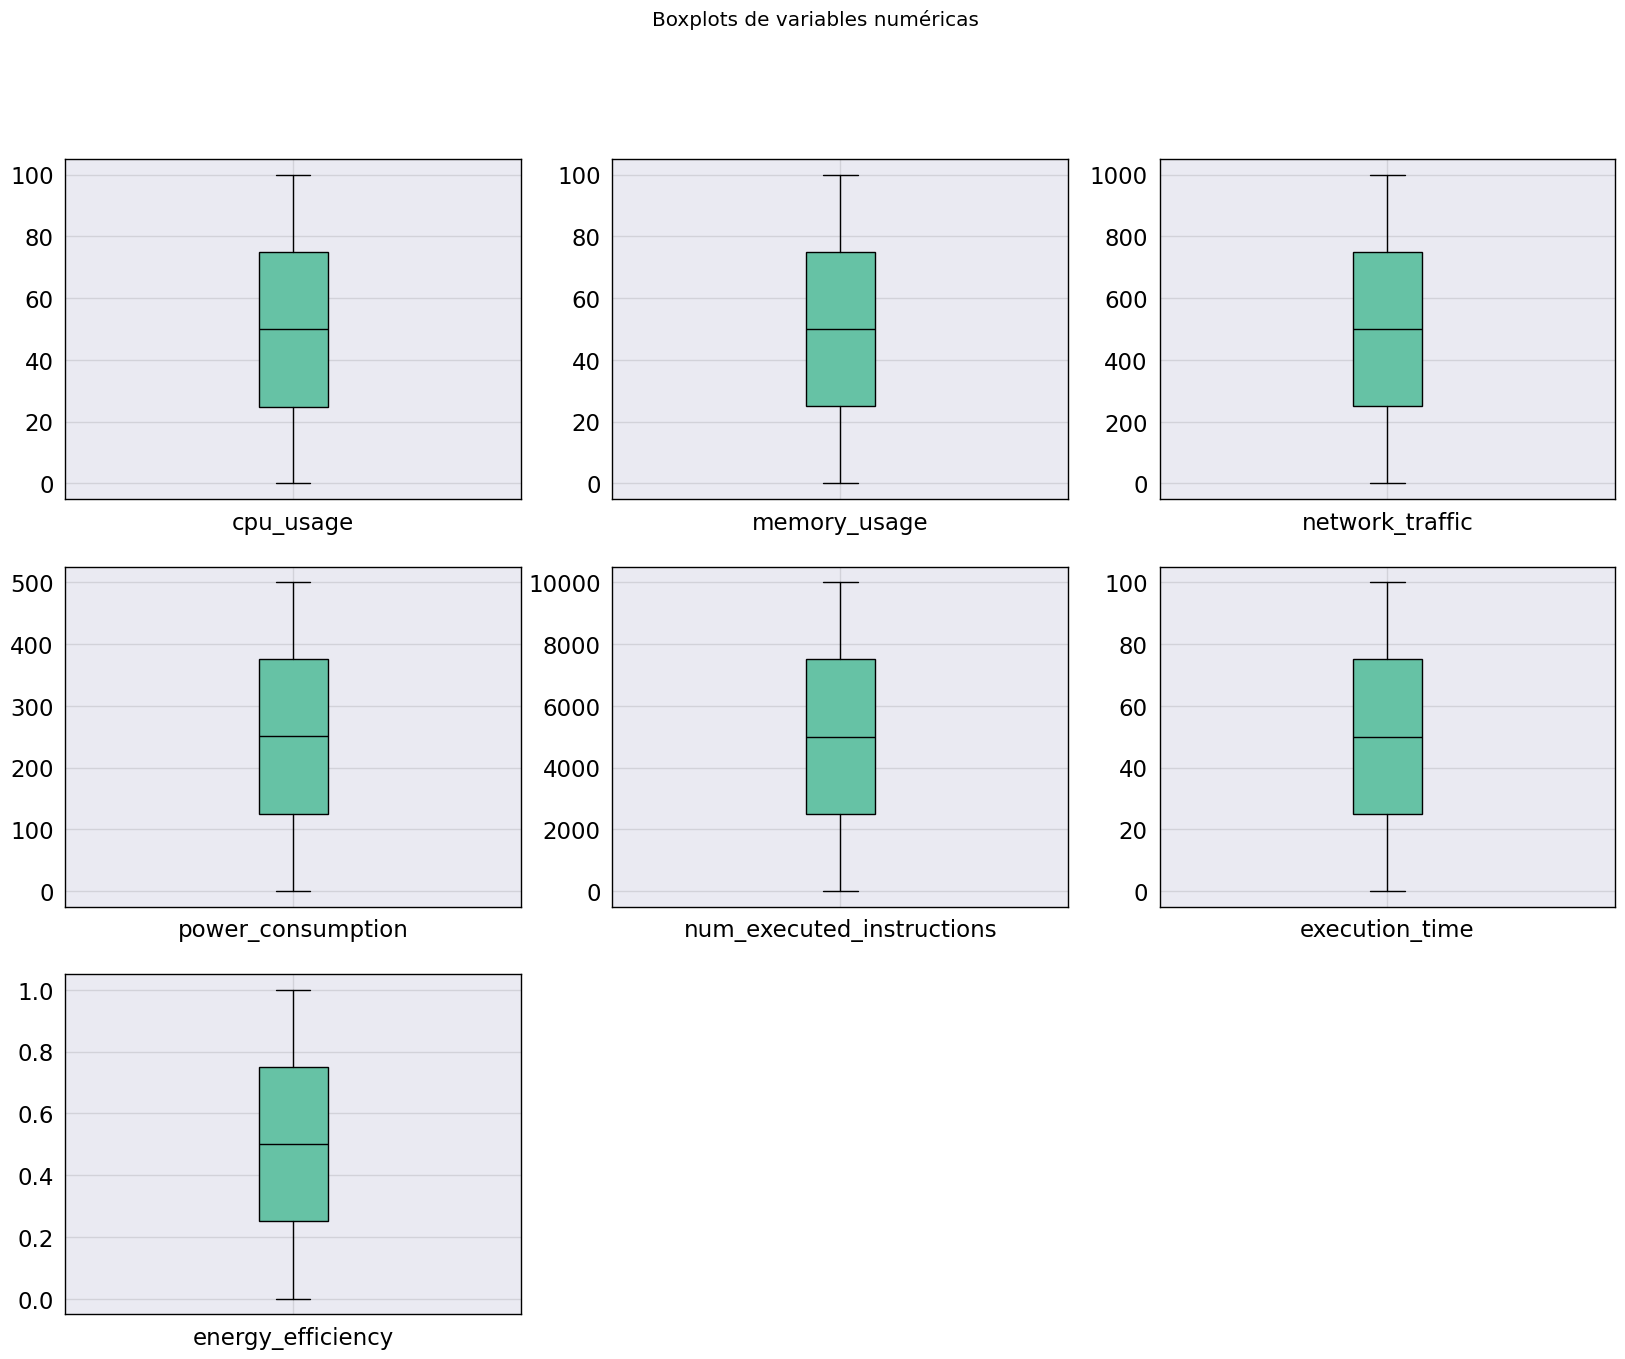

In [ ]:
# Histogramas por variable numérica
numerical_predictors = df.dropna().drop(['Anomaly status'], axis=1).select_dtypes(include=['int64','float64']).columns.tolist()

df[numerical_predictors].hist(figsize=(20,12), bins=20)
plt.suptitle("Histogramas de variables numéricas")
plt.show()

# Boxplot por variable numérica
df[numerical_predictors].plot.box(
    subplots=True, 
    layout=(3, 3),
    figsize=(20, 15),
    sharey=False,
    title="Boxplots de variables numéricas",
    patch_artist=True,
    boxprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    medianprops=dict(color="black"),
)
plt.show()

Al analizar los gráficos de los histogramas y de cajas y bigotes de cada una de las variables numéricas, podemos observar una distribución aproximadamente uniforme en todas las métricas del sistema, como el uso de CPU, memoria, tráfico de red, consumo de energía, tiempo de ejecución, eficiencia energética y número de instrucciones ejecutadas. Esto indica que los valores de estas variables se encuentran distribuidos de manera homogénea a lo largo de sus rangos, sin concentraciones o picos significativos en zonas específicas. Esta uniformidad sugiere que los datos del dataset original fueron preprocesados o generados artificialmente con el fin de mantener una cobertura completa de posibles estados operativos del sistema, más que representar mediciones naturales capturadas en un entorno real. En consecuencia, no se aprecian sesgos, valores atípicos ni tendencias evidentes, lo que facilita el trabajo de normalización y entrenamiento de modelos, aunque también puede limitar la detección de patrones no lineales si el comportamiento del sistema es demasiado idealizado.

**Inspección de Valores Faltantes**

En este punto, es muy importante conocer los valores faltantes por cada una de las variables, y muy importante, por cada clase de nuestra variable predictora `Anomaly status`. debido a que el fuerte desbalanceo del dataset, confirmado con anterioridad, nos obliga a ser especialmente cuidadosos con la clase minoritaria de anomalías (1). Para ello, usamos algunas funciones de las librería pandas, y visualizamos algunos gráficos con matplotlib.

Resumen de valores faltantes y no faltantes por clase de 'Anomaly status':


Clase 0 (Normal):
                           Valores no faltantes  Valores faltantes  Total registros
vm_id                                    234646              26270           260916
timestamp                                260916                  0           260916
cpu_usage                                235836              25080           260916
memory_usage                             234719              26197           260916
network_traffic                          234680              26236           260916
power_consumption                        234986              25930           260916
num_executed_instructions                234641              26275           260916
execution_time                           235745              25171           260916
energy_efficiency                        233528              27388           260916
task_type                                234674              2624

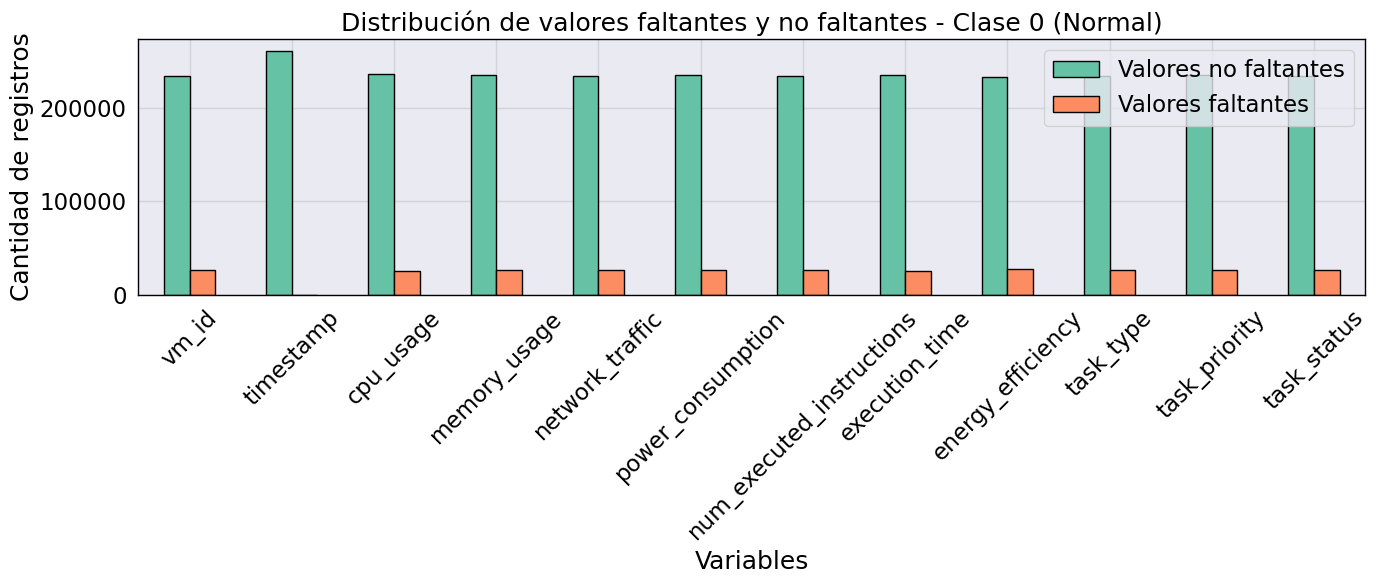


Clase 1 (Anómalo):
                           Valores no faltantes  Valores faltantes  Total registros
vm_id                                     14949               1705            16654
timestamp                                 16654                  0            16654
cpu_usage                                 14294               2360            16654
memory_usage                              15056               1598            16654
network_traffic                           15045               1609            16654
power_consumption                         15032               1622            16654
num_executed_instructions                 14996               1658            16654
execution_time                            14215               2439            16654
energy_efficiency                         16088                566            16654
task_type                                 14906               1748            16654
task_priority                             14972         

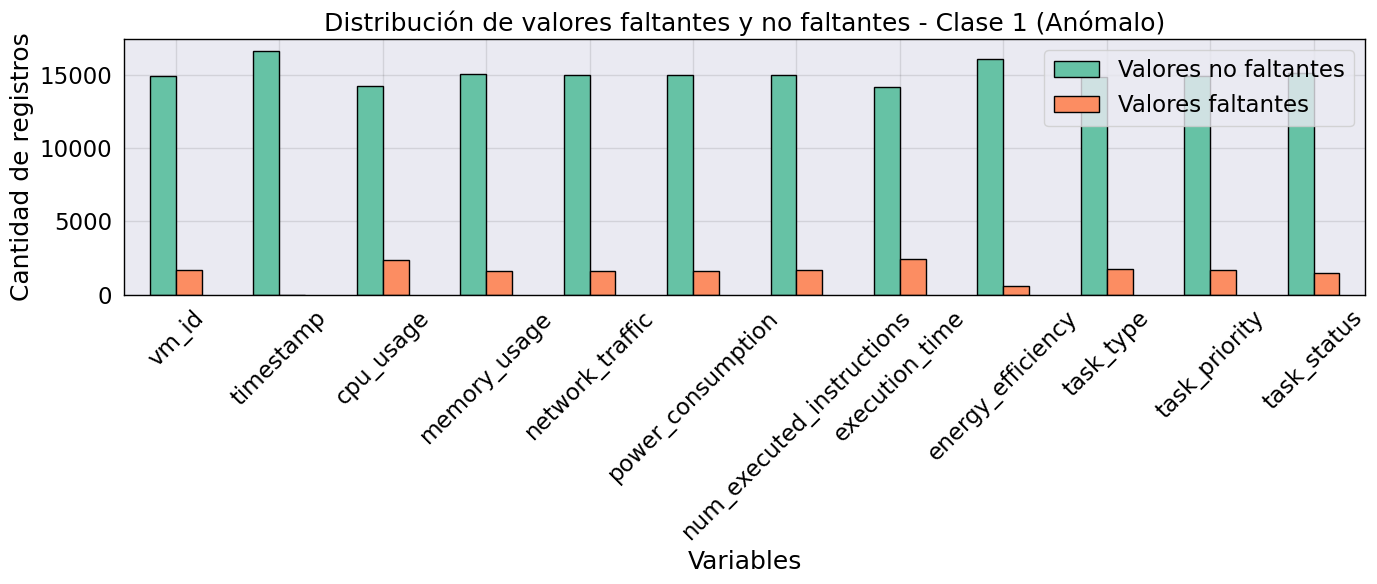

In [29]:
# Para cada clase se contabiliza los valores faltantes
missing_stats = df.groupby('Anomaly status').apply(
    lambda x: pd.DataFrame({
        'Valores no faltantes': x.notna().sum(),
        'Valores faltantes': x.isna().sum(),
        'Total registros': len(x)
    }),
    include_groups=False
)

print("Resumen de valores faltantes y no faltantes por clase de 'Anomaly status':\n")

for status in df['Anomaly status'].unique():
    print(f"\nClase {status} ({'Normal' if status == 0 else 'Anómalo'}):")
    subset = missing_stats.loc[status]
    try:
        print(subset.to_markdown(tablefmt="github"))
    except:
        print(subset.to_string(index=True))
    subset[['Valores no faltantes', 'Valores faltantes']].plot(
        kind='bar', figsize=(14,6),
        title=f"Distribución de valores faltantes y no faltantes - Clase {status} ({'Normal' if status == 0 else 'Anómalo'})"
    )
    # Se grafica el resultado por clase
    plt.xlabel("Variables")
    plt.ylabel("Cantidad de registros")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Podemos obeservar una similitud en el comportamiento de los valores faltantes entre las clases normal y anómala, y esto refuerza la idea de que los procesos de monitoreo fueron consistentes en ambas condiciones operativas como se evidenció en los histogramas y las medidas del resumen estadístico. Esta inspección nos permitirá abordar el tratamiento de los valores ausentes, aplicando estrategias de imputación o limpieza que mantengan la representatividad de los datos.


Resumen global de valores faltantes por variable:

                           Valores faltantes  Valores no faltantes  Total registros  Porcentaje faltantes (%)
task_type                              27990                249580           277570                     10.08
vm_id                                  27975                249595           277570                     10.08
energy_efficiency                      27954                249616           277570                     10.07
task_status                            27949                249621           277570                     10.07
num_executed_instructions              27933                249637           277570                     10.06
task_priority                          27896                249674           277570                     10.05
network_traffic                        27845                249725           277570                     10.03
memory_usage                           27795                249775  

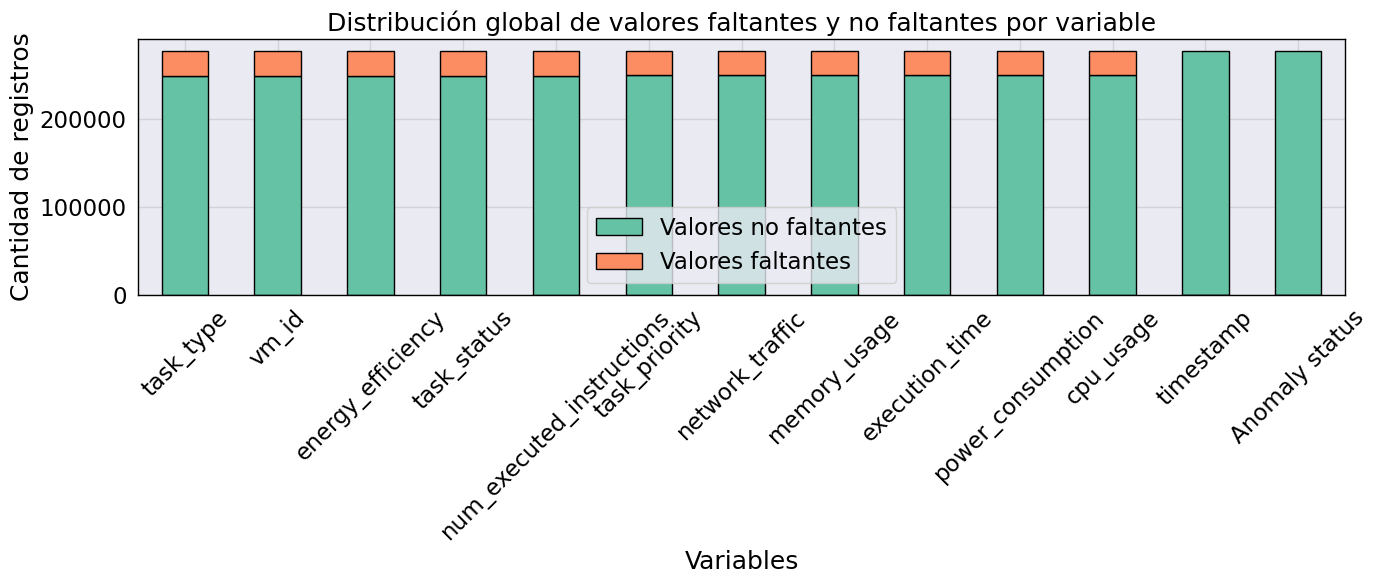

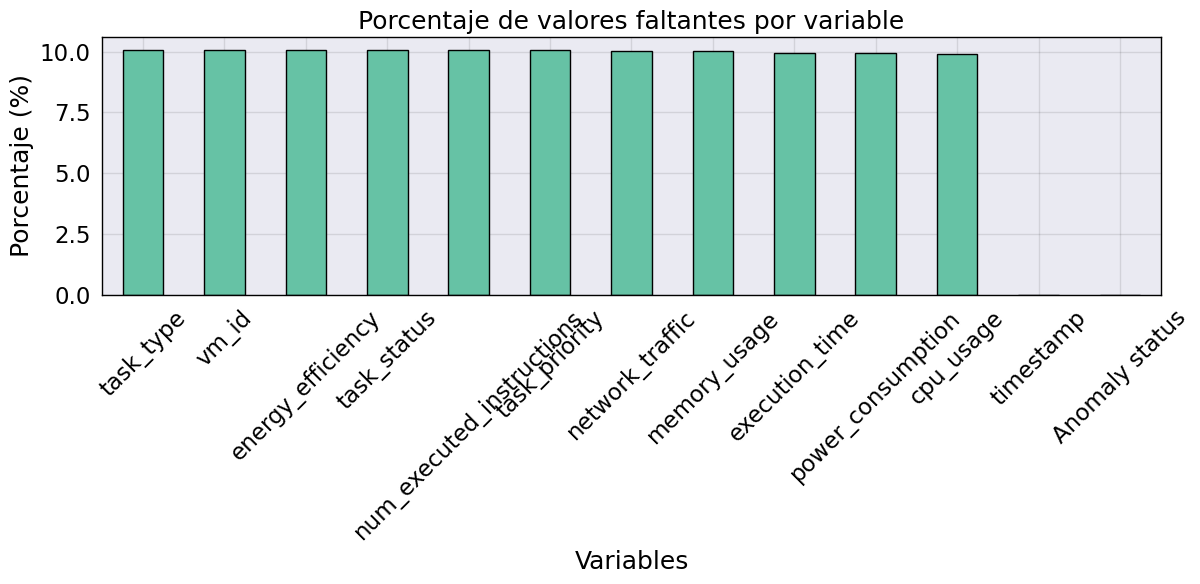

In [31]:
# Para los valores faltantes totales
missing_total = df.isnull().sum()
non_missing_total = df.notnull().sum()
total_values = len(df)

missing_percent = (missing_total / total_values) * 100

missing_df = pd.DataFrame({
    'Valores faltantes': missing_total,
    'Valores no faltantes': non_missing_total,
    'Total registros': total_values,
    'Porcentaje faltantes (%)': missing_percent
}).sort_values(by='Valores faltantes', ascending=False)

print("\nResumen global de valores faltantes por variable:\n")
try:
    print(missing_df.to_markdown(tablefmt="github", floatfmt=".2f"))
except:
    print(missing_df.to_string(float_format="%.2f"))

missing_df[['Valores no faltantes', 'Valores faltantes']].plot(
    kind='bar', stacked=True, figsize=(14,6),
)
plt.title("Distribución global de valores faltantes y no faltantes por variable")
plt.xlabel("Variables")
plt.ylabel("Cantidad de registros")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
missing_df['Porcentaje faltantes (%)'].plot(kind='bar')
plt.title("Porcentaje de valores faltantes por variable")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Variables")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


En general, el análisis de valores faltantes nos deja ver que el conjunto de datos mantiene una estructura relativamente consistente, con una proporción de ausencias cercana al 10% en la mayoría de las variables predictoras. Esta distribución uniforme sugiere que la falta de datos responde a causas sistemáticas o técnicas como fallas en la captura de métricas o registros incompletos más que a un sesgo asociado a la presencia de anomalías. Además, la inexistencia de valores faltantes en `timestamp` y `Anomaly status` garantiza la integridad temporal del conjunto y la fiabilidad de la variable objetivo, lo que permite avanzar en el análisis sin riesgo de pérdida de información crítica.

**Analisis de Correlación con Dataset en Crudo**

Ahora, es importante también analizar las correlaciones de las variables. Sin embargo, hay que tener presente que como lo hemos venido observando en esta inspección, el dataset tiene algunos datos faltantes, y variables categóricas que deberán ser convertidas a numéricas, por lo que, a este punto, no podemos analizarlas en esta observación de la correlación. Por lo que será necesario repetir este análisis en la selección de caracteristicas una vez los datos estén limpios y las variables categóricas correctamente codificadas y tener un mejor.

Correlaciones con 'Anomaly status':
Anomaly status               1.000000
network_traffic              0.040148
cpu_usage                    0.001908
num_executed_instructions    0.001474
power_consumption            0.000087
execution_time              -0.001197
memory_usage                -0.003578
energy_efficiency           -0.217539
Name: Anomaly status, dtype: float64


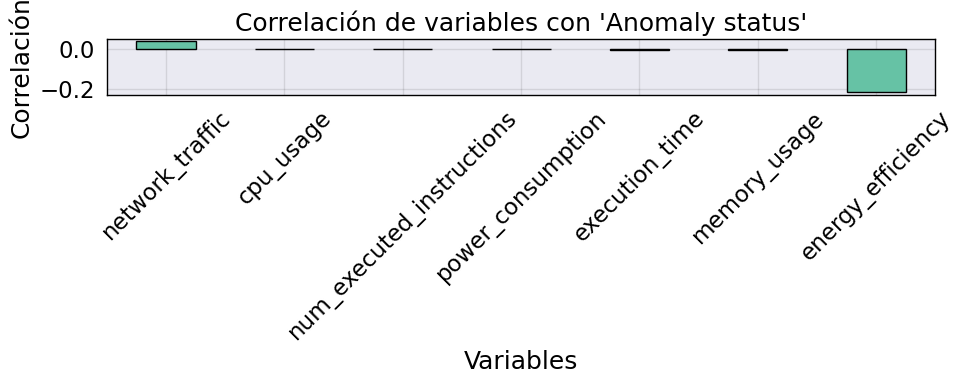

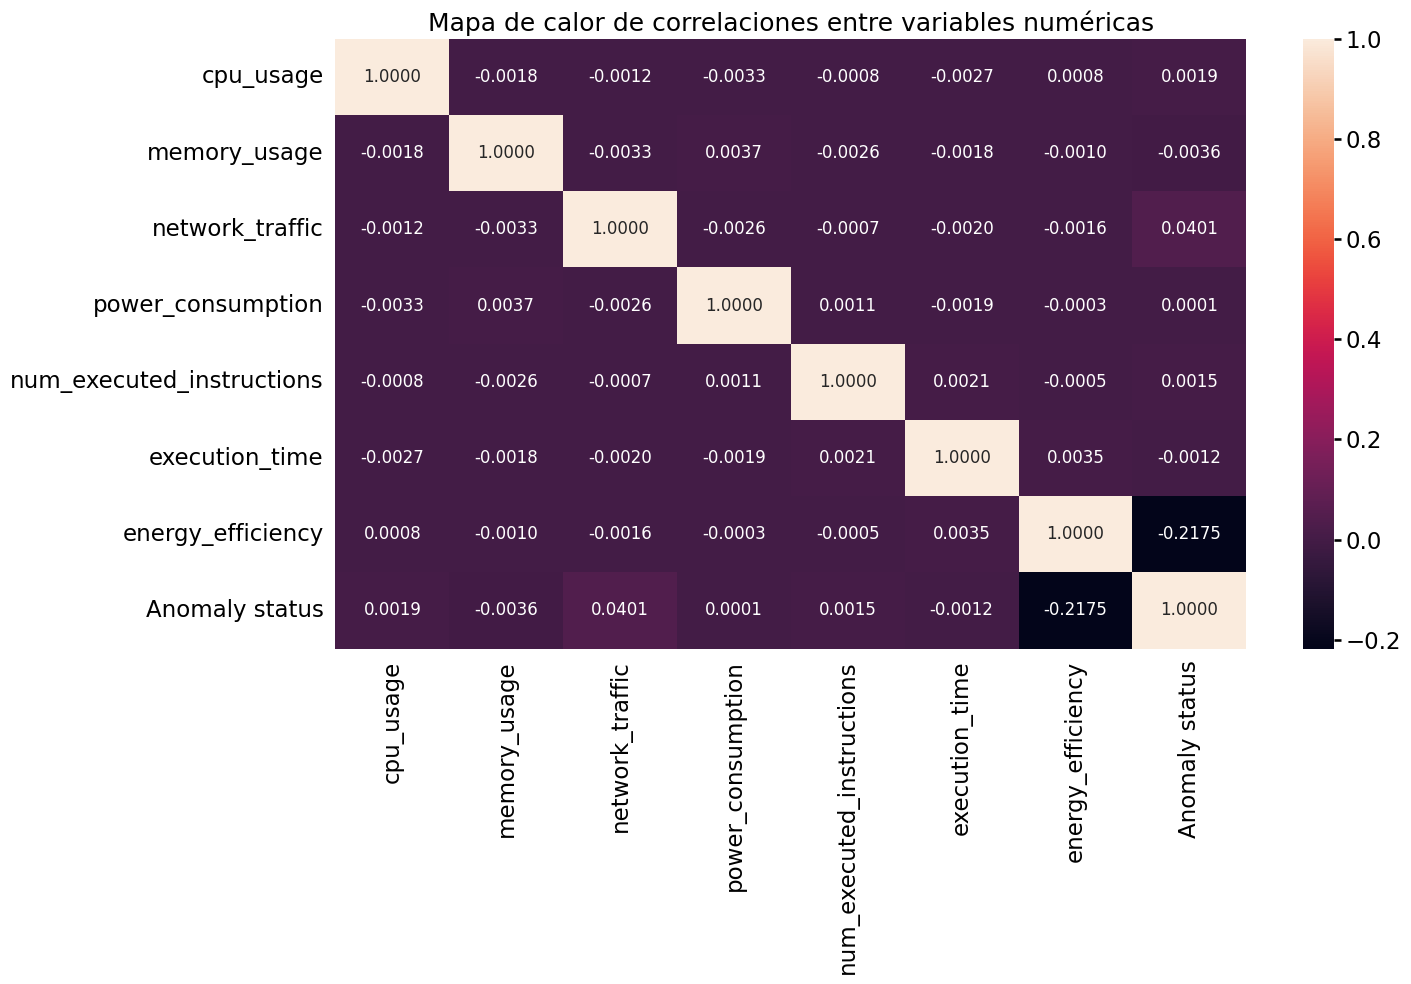

In [52]:
numerical_predictors = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
corr_matrix = df[numerical_predictors].corr()
print("Correlaciones con 'Anomaly status':")
corr_with_target = corr_matrix['Anomaly status'].sort_values(ascending=False)
print(corr_with_target)

# Correlación con la variable objetivo
plt.figure(figsize=(10,4))
corr_with_target.drop('Anomaly status').plot(kind='bar')
plt.title("Correlación de variables con 'Anomaly status'")
plt.ylabel("Correlación")
plt.xlabel("Variables")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mapa de calor
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, fmt=".4f", linewidths=0)
plt.title("Mapa de calor de correlaciones entre variables numéricas")
plt.tight_layout()
plt.show()

En este análisis de correlación podemos observar que `Anomaly status` mantiene relaciones muy débiles con la mayoría de las variables del sistema como `cpu_usage`, `num_executed_instructions`, `power_consumption`, `execution_time` y `memory_usage`, lo que puede indicar que ninguna de ellas tiene un vínculo lineal significativo con la presencia de anomalías. La única excepción relevante es `energy_efficiency`, que presenta una correlación negativa moderada (–0.217), sugiriendo que a medida que disminuye la eficiencia energética es más probable la aparición de anomalías, o viceversa, y quizá `network_traffic`. Estos resultados indican que las anomalías no parecen depender linealmente de los indicadores operativos tradicionales, salvo por la eficiencia energética.

Sin embargo, es importante considerar que esta aparente falta de relación puede estar influenciada por el fuerte desbalance del dataset (94% vs. 6%), que provoca que Anomaly status se comporte casi como una constante y dificulte que las correlaciones lineales reflejen patrones reales. A esto se suma que aún no se han incorporado las variables categóricas en su versión numérica, lo cual limita la información disponible para distinguir entre clases. Por ello, los valores de correlación cercanos a cero podrían no representar una verdadera ausencia de relación, sino más bien las restricciones impuestas por la distribución de las clases y la falta de codificación completa de las variables.

Analicemos visualmente la dispersión de las variables más correlacionadas.

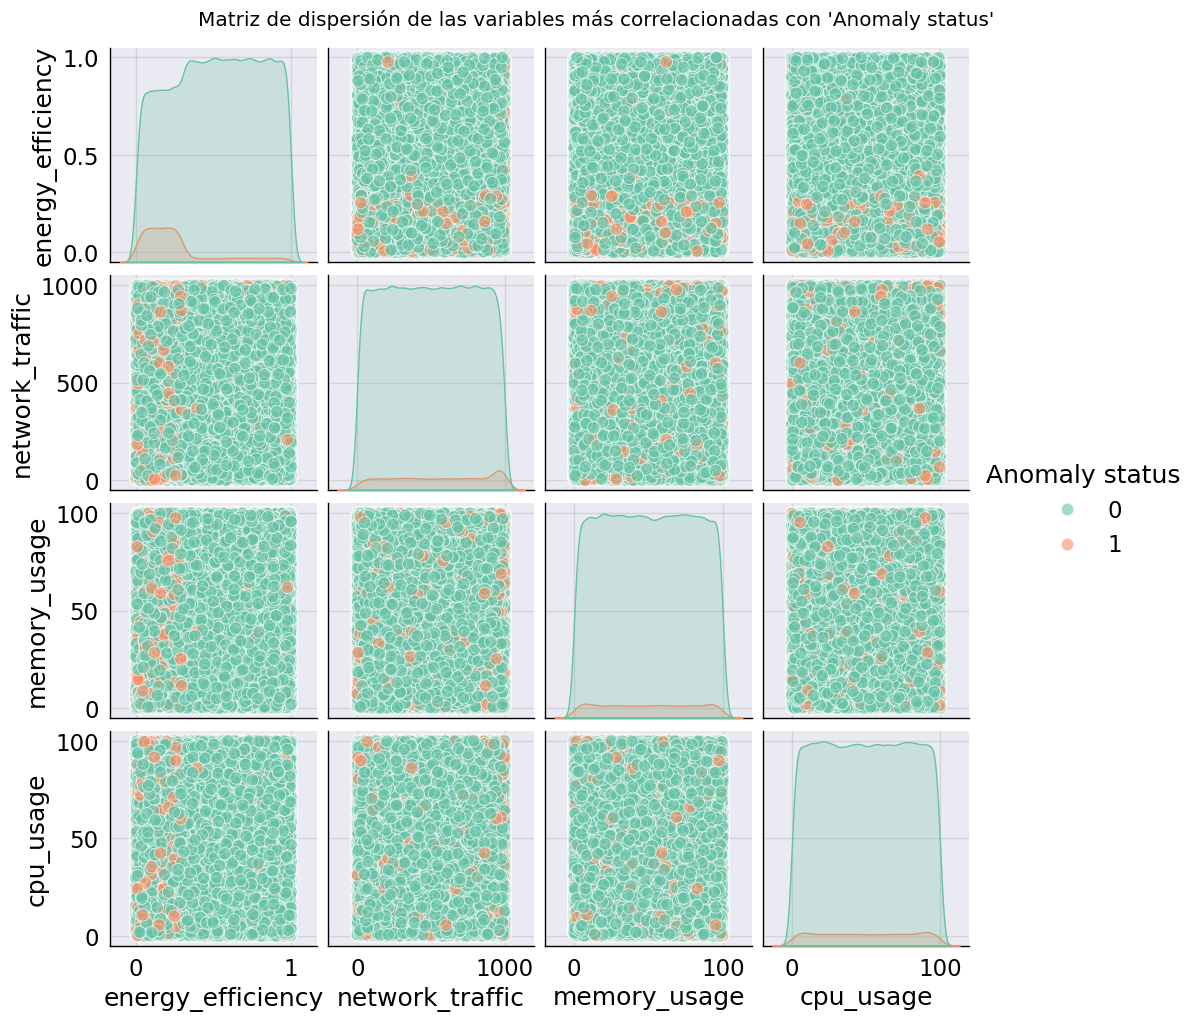

In [51]:
# Matriz de dispersión entre variables más correlacionadas
top_corr = corr_with_target.abs().sort_values(ascending=False)[1:5].index  # 4 variables más correlacionadas con la clase
sns.pairplot(df, vars=top_corr, hue='Anomaly status', palette='Set2', plot_kws={'alpha':0.6})
plt.suptitle("Matriz de dispersión de las variables más correlacionadas con 'Anomaly status'", y=1.02)
plt.show()

En esta matriz de correlación, construida a partir del dataset desbalanceado, se observa que los datos normales y anómalos aparecen completamente mezclados, sin una separación lineal ni agrupaciones evidentes, lo cual indica que ninguna variable por sí sola ya sea `cpu_usage`, `memory_usage`, `network_traffic` o `energy_efficiency` permite distinguir anomalías, pues estas se distribuyen a lo largo de todo el rango de valores. La ausencia de clusters, saltos o concentraciones diferenciadas sugiere que el sistema presenta un comportamiento continuo y estable donde las anomalías no son extremas, sino contextuales y sutiles, típicas de escenarios reales como rendimiento de máquinas virtuales, fallas de infraestructura o cargas irregulares.

Para intentar visualizar mejor un posible patrón, arbitrariamente ajustamos un dataset con 60 ejemplos de cada clase.

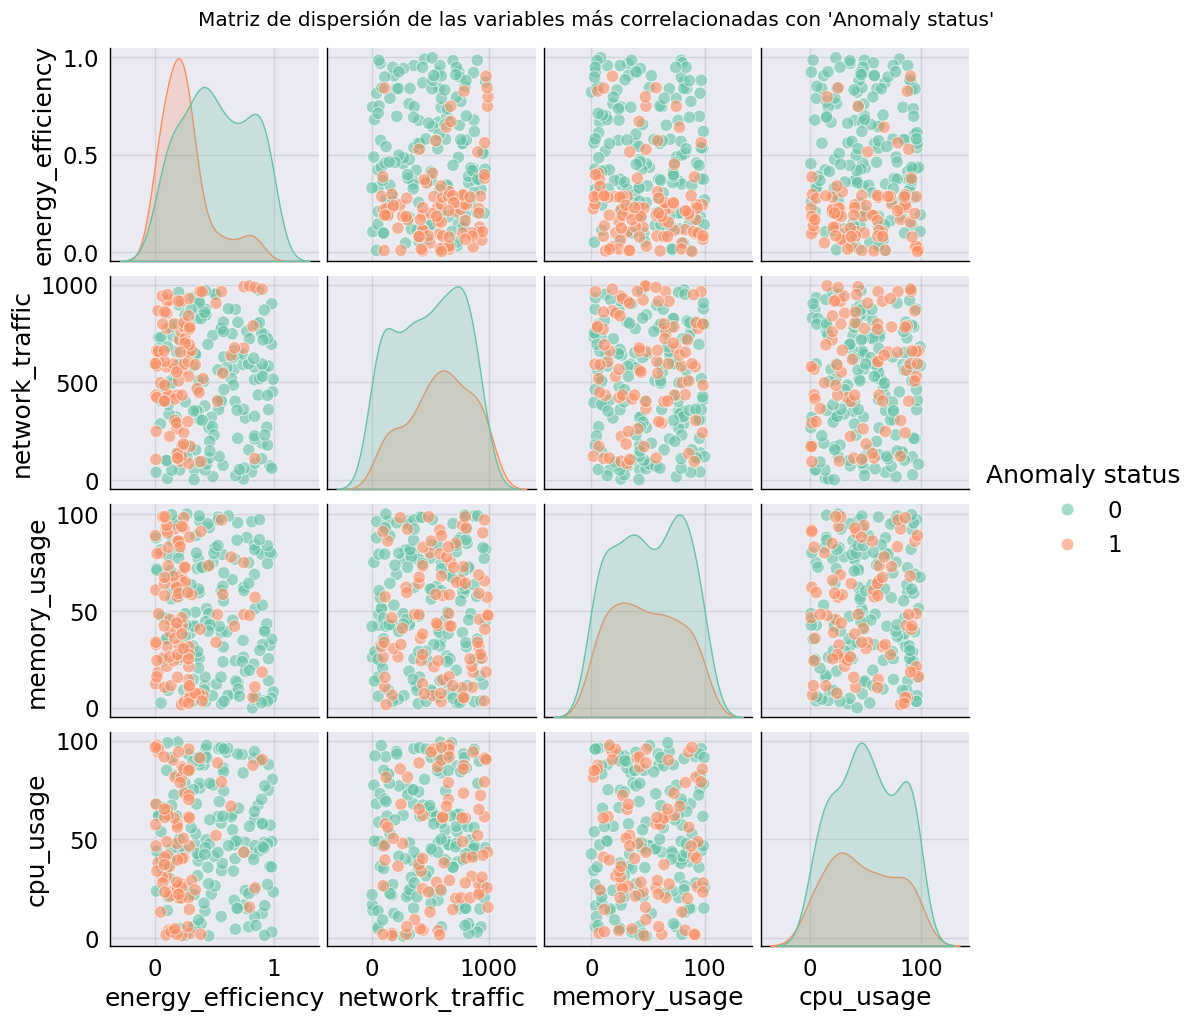

In [ ]:
numerical_predictors = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
corr_matrix = df[numerical_predictors].corr()
corr_with_target = corr_matrix['Anomaly status'].sort_values(ascending=False)

df_0 = df[df['Anomaly status'] == 0]
df_1 = df[df['Anomaly status'] == 1]

# Seleccionar 60 registros de cada clase
df_0_sample = df_0.sample(n=60, random_state=42)
df_1_sample = df_1.sample(n=60, random_state=42)

# Dataset ajustado para mejor visualización
df_balanced = pd.concat([df_0_sample, df_1_sample], axis=0).reset_index(drop=True)
top_corr = corr_with_target.abs().sort_values(ascending=False)[1:5].index  # 4 variables más correlacionadas con la clase
sns.pairplot(df_balanced, vars=top_corr, hue='Anomaly status', palette='Set2', plot_kws={'alpha':0.6})
plt.suptitle("Matriz de dispersión de las variables más correlacionadas con 'Anomaly status'", y=1.02)
plt.show()

La reducción del dataset permitió visualizar patrones que antes estaban ocultos por la alta densidad de datos, revelando que `energy_efficiency` es la variable con mayor capacidad discriminativa, pues las muestras anómalas tienden a concentrarse en valores bajos mientras que las normales ocupan principalmente rangos medios. `network_traffic` también muestra diferencias leves, con normales ligeramente más altas y anómalos más agrupados hacia valores medios o bajos, y en contraste, `cpu_usage` y `memory_usage` mantienen un solapamiento casi total entre clases, confirmando su bajo poder predictivo individual. 

A pesar de estas mejoras visuales, las combinaciones 2D siguen sin exhibir separación lineal ni clusters definidos, indicando que la detección de anomalías depende de relaciones no lineales y patrones combinados.

## II. Diseño de experimentos y recolección de resultados

### 3. Preparación de los Datos

Aa

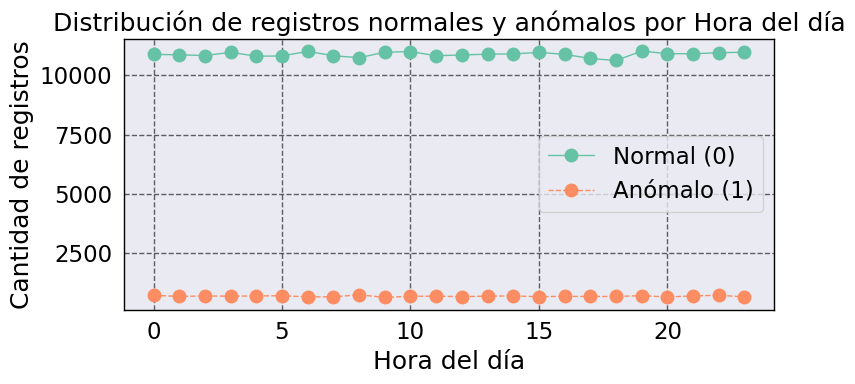

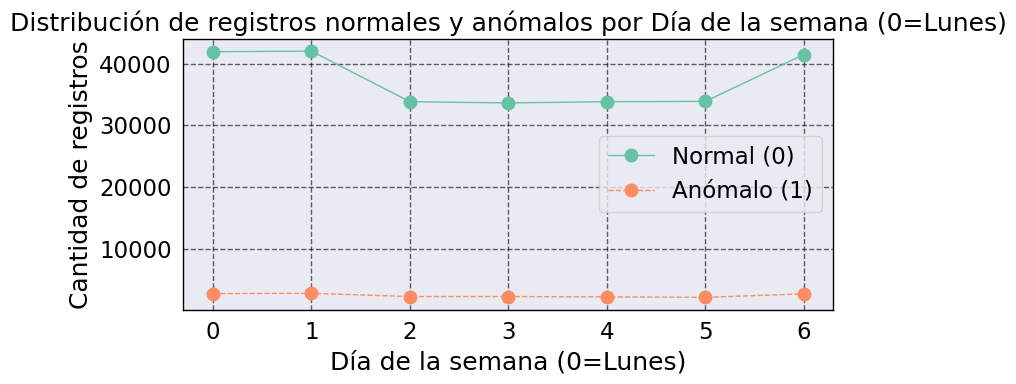

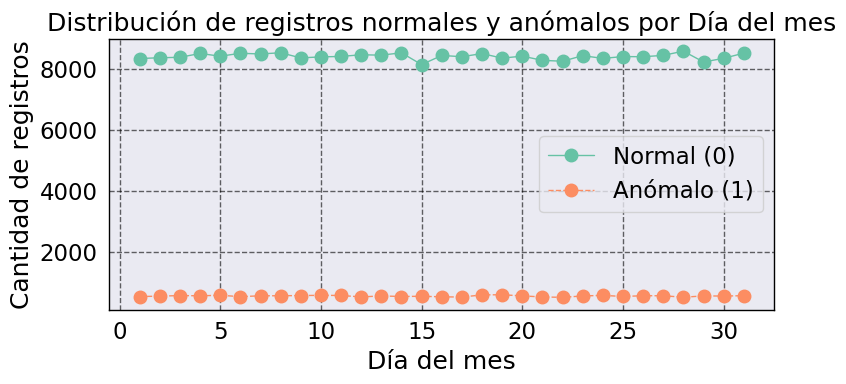

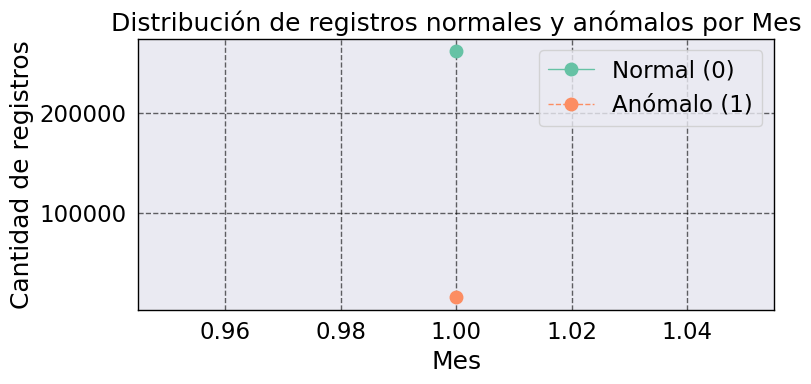

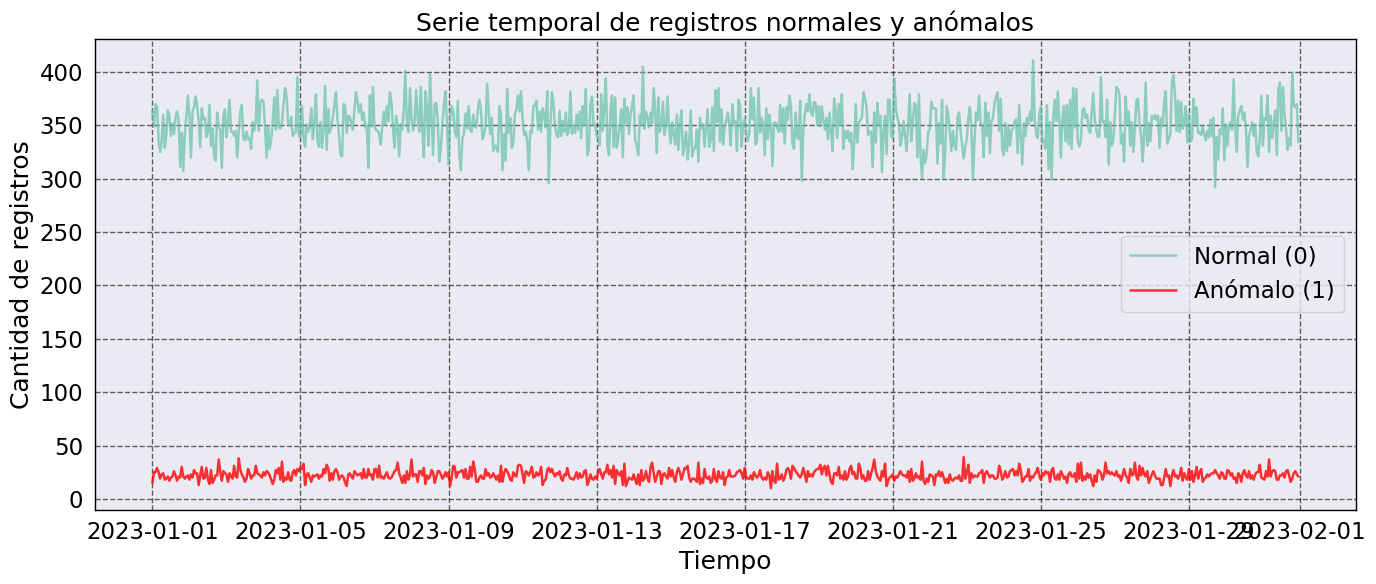

In [ ]:
# Convertir timestamp a datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d-%m-%Y %H:%M')

# Crear variables de tiempo
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek   # 0 = lunes, 6 = domingo
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month

def plot_by_anomaly(df, time_col, title):
    plt.figure(figsize=(10,8))
    
    # Filtrar por clase 0 (Normal)
    plt.subplot(2,1,1)
    normal = df[df['Anomaly status'] == 0].groupby(time_col)['Anomaly status'].count()
    plt.bar(normal.index, normal.values, color='steelblue')
    plt.title(f'Registros NORMALES (0) por {title}')
    plt.xlabel(title)
    plt.ylabel('Cantidad de registros')
    plt.grid(True, linestyle='--', alpha=0.6)

    # Filtrar por clase 1 (Anómalo)
    plt.subplot(2,1,2)
    anomalous = df[df['Anomaly status'] == 1].groupby(time_col)['Anomaly status'].count()
    plt.bar(anomalous.index, anomalous.values, color='indianred')
    plt.title(f'Registros ANÓMALOS (1) por {title}')
    plt.xlabel(title)
    plt.ylabel('Cantidad de registros')
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.show()

plot_by_anomaly(df, 'hour', 'Hora del día')
plot_by_anomaly(df, 'dayofweek', 'Día de la semana (0=Lunes)')
plot_by_anomaly(df, 'day', 'Día del mes')
plot_by_anomaly(df, 'month', 'Mes')

df[['hour', 'dayofweek', 'cpu_usage', 'memory_usage', 'Anomaly status']].corr()

# Agrupar por hora
df_time = df.set_index('timestamp')

# Contar registros normales (0) y anómalos (1) por hora
normal_series = df_time[df_time['Anomaly status'] == 0].resample('h').size()
anomaly_series = df_time[df_time['Anomaly status'] == 1].resample('h').size()

plt.figure(figsize=(14,6))
plt.plot(normal_series.index, normal_series.values, label='Normal (0)', alpha=0.7, linewidth=1.8)
plt.plot(anomaly_series.index, anomaly_series.values, label='Anómalo (1)', color='red', alpha=0.8, linewidth=1.8)

plt.title('Serie temporal de registros normales y anómalos')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de registros')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 4. Experimentos y Ajuste de Hiperparámetros

Aa

### 5. Resultados de los Experimentos

Aa

## III. Comparación de los modelos entrenados y conclusiones

### 6. Comparacion de los Métodos

Aa

### 7. Conclusiones

Aa

### 8. Recomendaciones

Aa

### 10. Referencias

[1] Peesara, S. (2025). *Cloud Infrastructure Anomaly Detection Data* [Dataset]. Kaggle.  
https://www.kaggle.com/datasets/sandhyapeesara/cloud-anomaly-data

[2] Chandola, V., Banerjee, A., & Kumar, V. (2009). *Anomaly Detection: A Survey*. ACM Computing Surveys, 41(3), 1-58.  
https://doi.org/10.1145/1541880.1541882

[3] He, H., & Garcia, E. (2009). *Learning from Imbalanced Data*. IEEE Transactions on Knowledge and Data Engineering, 21(9), 1263-1284.  
https://doi.org/10.1109/TKDE.2008.239

[4] Murthy, S. K., & Sarkar, S. (2022). *Cloud Resource Monitoring and Fault Detection Techniques: A Review*. Journal of Cloud Computing, 11(1).  
https://doi.org/10.1186/s13677-022-00301-9

### Anexos
En el directorio raíz en el que reposa este notebook de python, se adjunta el archivo del dataset en crudo descargado y descomprimido directamente desde el repositorio de Kaggle `Cloud_Anomaly_Dataset.csv`, y adicionalmente el conjunto de datos preparados para el entrenamiento de los modelos aquí implementados denominado `Cloud_Anomaly_Prepared.csv`.
